Kiet Nguyen

ID: 001601720

Email: kngu179@wgu.edu

### A. Purpose of Data Mining Report

#### *A1. Relevant Question*

Can the rate of churn, dependent variable `Churn`, be classified using the following independent variables: `Children`, `Age`, `Income`, `Tenure`, and `MonthlyCharge`?

#### *A2. Goal of Analysis*

The goal of this analysis was to see if a small number of features could be used to predict the rate of churn. Using classification analysis, we could identify whether a `Churn` observation could be classified as a `Yes` or a `No`. This is important for stakeholders since it costs 10 times more to acquire new customers than retaining current ones. In a competitive market, a lower churn rate would be vital for business success.

### B. Method Justification

#### *B1. Explanation of Method*

The chosen method for this analysis was K-Nearest Neighbors (KNN). This method classifies a new observation by finding K observations that have similar features, then it identifies the category of `Churn` among them and assign that category to the new observation. The prediction results depend on how the features are scaled, how similarity is measured, and how big K is set (Bruce et al., 2020).

#### *B2. Assumption Summary*

KNN assumes that similar things are near each other. It does this by calculating the distance between two points using metric such as Euclidean or straight-line distance (Chatterjee, 2021).

#### *B3. Python Libraries*

The libraries used for this analysis were:

- `numpy`: efficient numeric computation library.
- `pandas`: fast and flexibile data structures, such as `Series` and `DataFrame`, for data manipulation.
- `matplotlib` and `seaborn`: beautiful graphs and figures for data visualizations.
- `scikit-learn`: various functions and classes related to machine learning, such as classification and regression.

### C. Data Preparation

#### *C1. One Preprocessing Goal*

The first step for data preparation was to create a new dataframe containing only the independent and dependent variables.

#### *C2. Initial Dataset*

The analysis dataset consisted of 6 variables, 5 continuous and 1 categorical.

|                 | `Age` | `Children` | `Churn` | `Income` | `MonthlyCharge` | `Tenure` |
|:---------------:|:-----:|:----------:|:-------:|:--------:|:---------------:|:--------:|
| **Categorical** |       |            |    X    |          |                 |          |
|  **Continuous** |   X   |      X     |         |     X    |        X        |     X    |

#### *C3. Analysis Steps*

The steps to prepare the data were:

1. Import libraries and dataset.
2. Create new dataframe for relevant variables.
3. Check for and handle duplicated or missing data.
4. Explore variables and their basic statistics.
5. Visualize variables

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
%matplotlib inline

In [2]:
# Import churn dataset
churn = pd.read_csv('churn_clean.csv')

In [3]:
# Create new dataframe with relevant variables
df = churn[['Age', 'Children', 'Churn', 'Income', 'MonthlyCharge', 'Tenure']].copy()

In [4]:
# Check for duplicates
df.duplicated().any()

False

In [5]:
# Check for missing values
df.isnull().values.any()

False

In [6]:
# Churn statistics
df['Churn'].describe()

count     10000
unique        2
top          No
freq       7350
Name: Churn, dtype: object

In [7]:
# Independent variables statistics
df.describe()

,Age,Children,Income,MonthlyCharge,Tenure
count,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000
mean,53.078400,2.0877,39806.926771,172.624816,34.526188
std,20.698882,2.1472,28199.916702,42.943094,26.443063
min,18.000000,0.0000,348.670000,79.978860,1.000259
25%,35.000000,0.0000,19224.717500,139.979239,7.917694
50%,53.000000,1.0000,33170.605000,167.484700,35.430507
75%,71.000000,3.0000,53246.170000,200.734725,61.479795
max,89.000000,10.0000,258900.700000,290.160419,71.999280


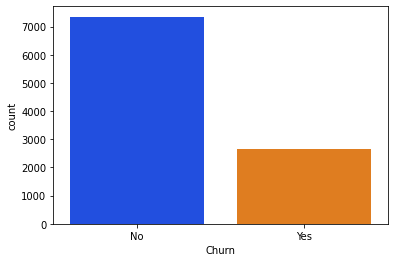

In [8]:
# Visualize churn
pal = sns.color_palette('bright')

sns.countplot(x='Churn', data=df, palette=pal)
plt.show()

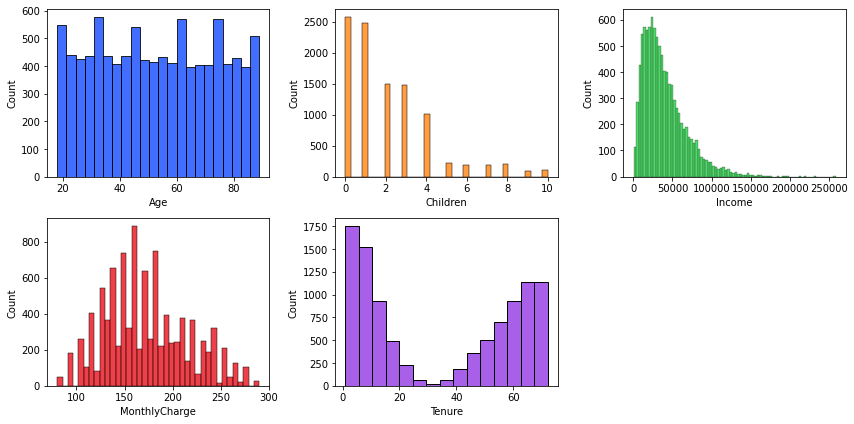

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(12, 6))

# Create list of continuous variables
cont = df.select_dtypes(include='number').columns.tolist()

# Loop and plot each continuous variable
x = 0
y = 0
for idx, var in enumerate(cont):
    if y == 3:
        x += 1
        y = 0
    sns.histplot(ax=axes[x, y], data=df[var], color=pal[idx])
    y += 1
    
fig.delaxes(axes[1, 2])
plt.tight_layout()
plt.show()

#### *C4. Copy of Data*

In [10]:
# Export prepared data to CSV
df.to_csv('churn_prep.csv', index=False)

### D. Data Analysis

#### *D1. Split Data*

In [11]:
# Scale continuous variables
scaler = StandardScaler()
df[cont] = scaler.fit_transform(df[cont])

In [12]:
# Create arrays for variables
y = df['Churn']
X = df.drop('Churn', axis=1)

# Split data with 30% test set
seed = 123
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed, stratify=y)

In [13]:
# Export training and testing data to CSV
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

#### *D2. Analysis Description*

The steps to perform KNN classification analysis were:

1. Scale data.
2. Split the data into training and testing.
3. Fit model and make predictions on test data.
4. Check model metrics.
5. Test different values of K to improve model performane.

In [14]:
knn = KNeighborsClassifier()

# Fit model and make predictions on test data
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [15]:
# Compute model metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.85      0.90      0.87      2205
         Yes       0.67      0.56      0.61       795

    accuracy                           0.81      3000
   macro avg       0.76      0.73      0.74      3000
weighted avg       0.80      0.81      0.80      3000



In [16]:
# Adapted from Classification chapter (Bowne-Anderson & Roy, 2022)
# https://app.datacamp.com/learn/courses/supervised-learning-with-scikit-learn

# Create arrays for K values, train, and test scores
neighbors = np.arange(1, 11)
train_scores = np.empty(len(neighbors))
test_scores = np.empty(len(neighbors))

# Loop over different values of K
for idx, kval in enumerate(neighbors):
    # Set n_neighbors with kval
    knn.n_neighbors = kval
    
    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    # Compute and append accuracies
    train_scores[idx] = knn.score(X_train, y_train)
    test_scores[idx] = knn.score(X_test, y_test)

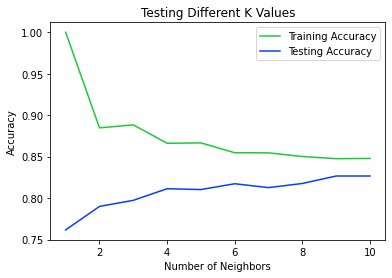

In [17]:
plt.title('Testing Different K Values')
plt.plot(neighbors, train_scores, label='Training Accuracy', color=pal[2])
plt.plot(neighbors, test_scores, label='Testing Accuracy', color=pal[0])
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [18]:
# Set neighbors value to 9 and refit model
knn.n_neighbors = 9
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.86      0.92      0.89      2205
         Yes       0.72      0.57      0.64       795

    accuracy                           0.83      3000
   macro avg       0.79      0.75      0.76      3000
weighted avg       0.82      0.83      0.82      3000



#### *D3. Analysis Code*

The code used to perform the classification analysis could be found above in section D2.

### E. Summary of Analysis

#### *E1. AUC Explanation*

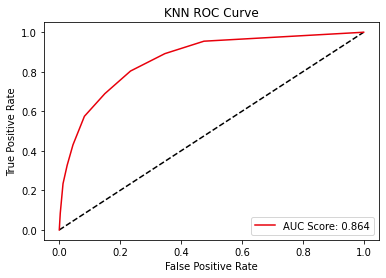

In [19]:
# Adapted from Fine-Tuning Your Model chapter (Bowne-Anderson & Roy, 2022)
# https://app.datacamp.com/learn/courses/supervised-learning-with-scikit-learn

# Encode churn to 0/1
y_dummy = pd.get_dummies(y_test, drop_first=True)

# Calculate class probabilities for each data point
y_pred_prob = knn.predict_proba(X_test)[:, 1]

# Compute false positive, true positive, and thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(y_dummy, y_pred_prob)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label=f'AUC Score: {auc_score:.3f}', color=pal[3])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend(loc='lower right')
plt.show()

While we used the classification report to quantitatively evaluate model performance, the ROC curve provided a way to visually evaluate models. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes (Narkhede, 2022). For this analysis, a high AUC score means that the model is performing well at classifying customers who churn versus customers who do not churn. The model had an AUC score of 0.864, which meant that the model could identify between churn and no churn with an 86.4% chance. The score was information because it told us that our model could detect more true positives and true negatives. 

#### *E2. Analysis Results*

The classification report showed an overall accuracy of 0.83. Normally this would be a good score overall. However, our dependent variable `Churn` was imbalanced, with 7350 `No` and 2650 `Yes`. This created an uneven distribution where one class label had more observations than the other. This meant our classification model get more biased toward predicting the majority class `No` (Mazumder, 2021). Instead of relying only on the accuracy as the main evaluation metric, we should use the F1-score.

The F1-score is the harmonic mean of precision and recall. It took into account false positives and false negatives so it is more useful than accuracy in an uneven distribution. In the report, the F1-score of predicting `No` was 0.89 and predicting `Yes` was 0.64. This result was expected since we had less `No` observations to work with. We could be fairly confident with this model when it predicted customers who would not churn. However, when the prediction stated that the customers would churn, we will need to look deeper into those results.

#### *E3. Limitation of Analysis*

One of the limitation was the imbalanced dependent variable `Churn`. This variable had more class label `No` than `Yes` so it could lead to a bias predictions. Imbalanced data is a common scenarios in real-world data. To counter this, we would need to sample with replacement in future analysis to ensure an even distribution. 

#### *E4. Recommendations*

Based on the model result, the best recommendation to stakeholders is to use the model to predict customers who would not churn and gather data on those customers. This is because the model is much better at predicting class label `No` for churn. By predicting those customers, we could see what characteristics they share. This allows us to target those customers in the future with promotions and lower prices to retain them. The data gathered from them could also be used to perform additional analysis.

### F. Panopto Recording

**Link**: https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=de534e6c-3eec-4239-ab0a-ae94003ac282

### G. Third-Party Code

Scikit-Learn Project. (n.d.). 6.3. Preprocessing data. Scikit-Learn. Retrieved May 11, 2022, from https://scikit-learn.org/stable/modules/preprocessing.html

### H. References

Bowne-Anderson, H., & Roy, Y. (2022). Supervised Learning with scikit-learn. DataCamp. Retrieved May 11, 2022, from https://app.datacamp.com/learn/courses/supervised-learning-with-scikit-learn

Bruce, P., Bruce, A., & Gedeck, P. (2020). Practical Statistics for Data Scientists: 50+ Essential Concepts Using R and Python (2nd ed.). O’Reilly Media.

Chatterjee, M. (2021, April 19). The Introduction of KNN Algorithm | What is KNN Algorithm? GreatLearning Blog: Free Resources What Matters to Shape Your Career! Retrieved May 11, 2022, from https://www.mygreatlearning.com/blog/knn-algorithm-introduction/

Mazumder, S. (2021, June 23). What is Imbalanced Data | Techniques to Handle Imbalanced Data. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/

Narkhede, S. (2022, March 5). Understanding AUC - ROC Curve. Medium. Retrieved May 12, 2022, from https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5